In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from matplotlib import cm

In [5]:
df = pd.read_pickle("./feature/f_2d_table.pkl")

In [6]:
f_list = []
for f in df["feature"].values:
    f_list.append(f[0])

In [10]:
pred = KMeans(n_clusters=10).fit_predict(f_list)

In [11]:
pred2 = KMeans(n_clusters=5).fit_predict(f_list)

In [14]:
np.save("./feature/k_means_10",pred)

In [16]:
np.save("./feature/k_means_5",pred2)

In [3]:
k_means_10 = np.load("./feature/k_means_10.npy")

In [4]:
k_means_10

array([1, 1, 2, ..., 5, 1, 4], dtype=int32)

In [ ]:
cluster_labels = np.unique(k_means_10)       # y_kmの要素の中で重複を無くす
n_clusters=cluster_labels.shape[0]     # 配列の長さを返す。つまりここでは n_clustersで指定した3となる

# シルエット係数を計算
silhouette_vals = silhouette_samples(f_list,k_means_10,metric='euclidean')  # サンプルデータ, クラスター番号、ユークリッド距離でシルエット係数計算
y_ax_lower, y_ax_upper= 0,0
yticks = []

for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[k_means_10==c]      # cluster_labelsには 0,1,2が入っている（enumerateなのでiにも0,1,2が入ってる（たまたま））
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)              # サンプルの個数をクラスターごとに足し上げてy軸の最大値を決定
        color = cm.jet(float(i)/n_clusters)               # 色の値を作る
        plt.barh(range(y_ax_lower,y_ax_upper),            # 水平の棒グラフのを描画（底辺の範囲を指定）
                         c_silhouette_vals,               # 棒の幅（1サンプルを表す）
                         height=1.0,                      # 棒の高さ
                         edgecolor='none',                # 棒の端の色
                         color=color)                     # 棒の色
        yticks.append((y_ax_lower+y_ax_upper)/2)          # クラスタラベルの表示位置を追加
        y_ax_lower += len(c_silhouette_vals)              # 底辺の値に棒の幅を追加

silhouette_avg = np.mean(silhouette_vals)                 # シルエット係数の平均値
plt.axvline(silhouette_avg,color="red",linestyle="--")    # 係数の平均値に破線を引く 
plt.yticks(yticks,cluster_labels + 1)                     # クラスタレベルを表示
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
plt.show()

In [13]:
df_class_list = []
for i in range(10):
    df_class_list.append(df[df.label==i])

In [17]:
df_class_list[0]

,img_name,feature,label,f_2d
29,img_29,"[[0.0, 0.0, 0.0, 1.6774806, 0.0, 0.0, 0.0, 0.0...",0,"[-4.432217314051309, -3.899856096207596]"
30,img_30,"[[0.0, 1.4798678, 0.0, 0.96289325, 1.5176281, ...",0,"[-4.96831327454798, 0.8593616613663497]"
35,img_35,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.21134377, 1.64251...",0,"[-5.329371866750139, -2.1778005266501284]"
49,img_49,"[[0.0, 0.004897535, 0.1804282, 1.9772942, 0.0,...",0,"[-4.447071844904856, 2.9262752640473577]"
77,img_77,"[[0.0, 2.7861645, 0.0, 1.6173205, 1.5730464, 0...",0,"[6.709139841714688, 1.2282415295674758]"
93,img_93,"[[0.0, 1.0565002, 0.0, 1.4963686, 0.8493696, 0...",0,"[-5.3736910696601985, 3.466649746401456]"
115,img_115,"[[0.0, 1.0301338, 0.0, 1.934993, 0.0, 0.0, 0.0...",0,"[-4.252610702753716, 2.030743796905243]"
116,img_116,"[[0.0, 0.0, 1.8335621, 2.1211562, 1.1858078, 0...",0,"[-4.932987855712172, -1.2590001988441404]"
129,img_129,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,"[-5.014823897036227, -2.3745114446505213]"
165,img_165,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,"[-4.664135069173417, -5.201896276622429]"


In [22]:
f_list_0 = []
for f in df_class_list[0].feature.values:
    f_list_0.append(f[0])

In [25]:
pred_0 = KMeans(n_clusters=10).fit_predict(f_list_0)

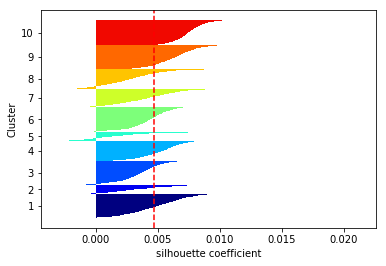

In [26]:
cluster_labels = np.unique(pred_0)       # y_kmの要素の中で重複を無くす
n_clusters=cluster_labels.shape[0]     # 配列の長さを返す。つまりここでは n_clustersで指定した3となる

# シルエット係数を計算
silhouette_vals = silhouette_samples(f_list_0,pred_0,metric='euclidean')  # サンプルデータ, クラスター番号、ユークリッド距離でシルエット係数計算
y_ax_lower, y_ax_upper= 0,0
yticks = []

for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[pred_0==c]      # cluster_labelsには 0,1,2が入っている（enumerateなのでiにも0,1,2が入ってる（たまたま））
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)              # サンプルの個数をクラスターごとに足し上げてy軸の最大値を決定
        color = cm.jet(float(i)/n_clusters)               # 色の値を作る
        plt.barh(range(y_ax_lower,y_ax_upper),            # 水平の棒グラフのを描画（底辺の範囲を指定）
                         c_silhouette_vals,               # 棒の幅（1サンプルを表す）
                         height=1.0,                      # 棒の高さ
                         edgecolor='none',                # 棒の端の色
                         color=color)                     # 棒の色
        yticks.append((y_ax_lower+y_ax_upper)/2)          # クラスタラベルの表示位置を追加
        y_ax_lower += len(c_silhouette_vals)              # 底辺の値に棒の幅を追加

silhouette_avg = np.mean(silhouette_vals)                 # シルエット係数の平均値
plt.axvline(silhouette_avg,color="red",linestyle="--")    # 係数の平均値に破線を引く 
plt.yticks(yticks,cluster_labels + 1)                     # クラスタレベルを表示
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
plt.show()

In [27]:
pred_0_c5 = KMeans(n_clusters=5).fit_predict(f_list_0)

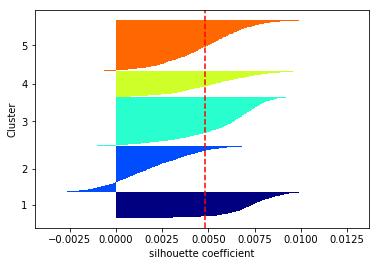

In [28]:
cluster_labels = np.unique(pred_0_c5)       # y_kmの要素の中で重複を無くす
n_clusters=cluster_labels.shape[0]     # 配列の長さを返す。つまりここでは n_clustersで指定した3となる

# シルエット係数を計算
silhouette_vals = silhouette_samples(f_list_0,pred_0_c5,metric='euclidean')  # サンプルデータ, クラスター番号、ユークリッド距離でシルエット係数計算
y_ax_lower, y_ax_upper= 0,0
yticks = []

for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[pred_0_c5==c]      # cluster_labelsには 0,1,2が入っている（enumerateなのでiにも0,1,2が入ってる（たまたま））
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)              # サンプルの個数をクラスターごとに足し上げてy軸の最大値を決定
        color = cm.jet(float(i)/n_clusters)               # 色の値を作る
        plt.barh(range(y_ax_lower,y_ax_upper),            # 水平の棒グラフのを描画（底辺の範囲を指定）
                         c_silhouette_vals,               # 棒の幅（1サンプルを表す）
                         height=1.0,                      # 棒の高さ
                         edgecolor='none',                # 棒の端の色
                         color=color)                     # 棒の色
        yticks.append((y_ax_lower+y_ax_upper)/2)          # クラスタラベルの表示位置を追加
        y_ax_lower += len(c_silhouette_vals)              # 底辺の値に棒の幅を追加

silhouette_avg = np.mean(silhouette_vals)                 # シルエット係数の平均値
plt.axvline(silhouette_avg,color="red",linestyle="--")    # 係数の平均値に破線を引く 
plt.yticks(yticks,cluster_labels + 1)                     # クラスタレベルを表示
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
plt.show()

In [29]:
pred_0_c4 = KMeans(n_clusters=4).fit_predict(f_list_0)

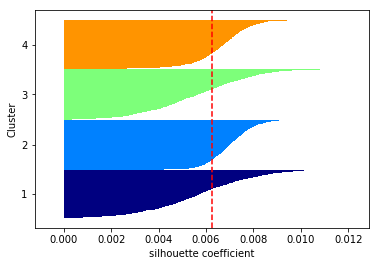

In [30]:
cluster_labels = np.unique(pred_0_c4)       # y_kmの要素の中で重複を無くす
n_clusters=cluster_labels.shape[0]     # 配列の長さを返す。つまりここでは n_clustersで指定した3となる

# シルエット係数を計算
silhouette_vals = silhouette_samples(f_list_0,pred_0_c4,metric='euclidean')  # サンプルデータ, クラスター番号、ユークリッド距離でシルエット係数計算
y_ax_lower, y_ax_upper= 0,0
yticks = []

for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[pred_0_c4==c]      # cluster_labelsには 0,1,2が入っている（enumerateなのでiにも0,1,2が入ってる（たまたま））
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)              # サンプルの個数をクラスターごとに足し上げてy軸の最大値を決定
        color = cm.jet(float(i)/n_clusters)               # 色の値を作る
        plt.barh(range(y_ax_lower,y_ax_upper),            # 水平の棒グラフのを描画（底辺の範囲を指定）
                         c_silhouette_vals,               # 棒の幅（1サンプルを表す）
                         height=1.0,                      # 棒の高さ
                         edgecolor='none',                # 棒の端の色
                         color=color)                     # 棒の色
        yticks.append((y_ax_lower+y_ax_upper)/2)          # クラスタラベルの表示位置を追加
        y_ax_lower += len(c_silhouette_vals)              # 底辺の値に棒の幅を追加

silhouette_avg = np.mean(silhouette_vals)                 # シルエット係数の平均値
plt.axvline(silhouette_avg,color="red",linestyle="--")    # 係数の平均値に破線を引く 
plt.yticks(yticks,cluster_labels + 1)                     # クラスタレベルを表示
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
plt.show()

In [31]:
pred_0_c4

array([0, 0, 1, ..., 3, 1, 1], dtype=int32)

In [35]:
df_0 = df_class_list[0]
df_0["cluster"] = pred_0_c4

/home/nise-s208/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
df_0

,img_name,feature,label,f_2d,cluster
29,img_29,"[[0.0, 0.0, 0.0, 1.6774806, 0.0, 0.0, 0.0, 0.0...",0,"[-4.432217314051309, -3.899856096207596]",0
30,img_30,"[[0.0, 1.4798678, 0.0, 0.96289325, 1.5176281, ...",0,"[-4.96831327454798, 0.8593616613663497]",0
35,img_35,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.21134377, 1.64251...",0,"[-5.329371866750139, -2.1778005266501284]",1
49,img_49,"[[0.0, 0.004897535, 0.1804282, 1.9772942, 0.0,...",0,"[-4.447071844904856, 2.9262752640473577]",0
77,img_77,"[[0.0, 2.7861645, 0.0, 1.6173205, 1.5730464, 0...",0,"[6.709139841714688, 1.2282415295674758]",2
93,img_93,"[[0.0, 1.0565002, 0.0, 1.4963686, 0.8493696, 0...",0,"[-5.3736910696601985, 3.466649746401456]",1
115,img_115,"[[0.0, 1.0301338, 0.0, 1.934993, 0.0, 0.0, 0.0...",0,"[-4.252610702753716, 2.030743796905243]",0
116,img_116,"[[0.0, 0.0, 1.8335621, 2.1211562, 1.1858078, 0...",0,"[-4.932987855712172, -1.2590001988441404]",1
129,img_129,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,"[-5.014823897036227, -2.3745114446505213]",1
165,img_165,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,"[-4.664135069173417, -5.201896276622429]",0


In [41]:
pred_0_c3 = KMeans(n_clusters=3).fit_predict(f_list_0)

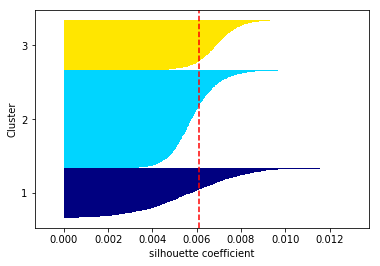

In [42]:
cluster_labels = np.unique(pred_0_c3)       # y_kmの要素の中で重複を無くす
n_clusters=cluster_labels.shape[0]     # 配列の長さを返す。つまりここでは n_clustersで指定した3となる

# シルエット係数を計算
silhouette_vals = silhouette_samples(f_list_0,pred_0_c3,metric='euclidean')  # サンプルデータ, クラスター番号、ユークリッド距離でシルエット係数計算
y_ax_lower, y_ax_upper= 0,0
yticks = []

for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[pred_0_c3==c]      # cluster_labelsには 0,1,2が入っている（enumerateなのでiにも0,1,2が入ってる（たまたま））
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)              # サンプルの個数をクラスターごとに足し上げてy軸の最大値を決定
        color = cm.jet(float(i)/n_clusters)               # 色の値を作る
        plt.barh(range(y_ax_lower,y_ax_upper),            # 水平の棒グラフのを描画（底辺の範囲を指定）
                         c_silhouette_vals,               # 棒の幅（1サンプルを表す）
                         height=1.0,                      # 棒の高さ
                         edgecolor='none',                # 棒の端の色
                         color=color)                     # 棒の色
        yticks.append((y_ax_lower+y_ax_upper)/2)          # クラスタラベルの表示位置を追加
        y_ax_lower += len(c_silhouette_vals)              # 底辺の値に棒の幅を追加

silhouette_avg = np.mean(silhouette_vals)                 # シルエット係数の平均値
plt.axvline(silhouette_avg,color="red",linestyle="--")    # 係数の平均値に破線を引く 
plt.yticks(yticks,cluster_labels + 1)                     # クラスタレベルを表示
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
plt.show()

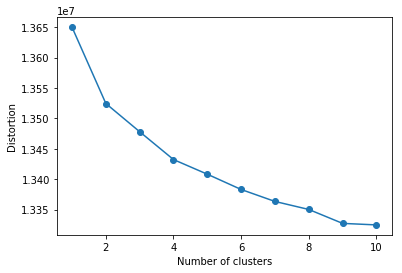

In [43]:
distortions = []

for i  in range(1,11):                # 1~10クラスタまで一気に計算 
    km = KMeans(n_clusters=i,
                init='k-means++',     # k-means++法によりクラスタ中心を選択
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(f_list_0)                         # クラスタリングの計算を実行
    distortions.append(km.inertia_)   # km.fitするとkm.inertia_が得られる

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
f_list = []
f_class_list = []
for i in range(10):
    for f in df_class_list[i].feature.values:
        f_class_list.append(f[0])
    f_list.append(f_class_list)
    f_class_list = []

In [ ]:
pred_list = []
for i in range(10):
    pred_list.append(KMeans(n_clusters=3).fit_predict(f_list[i]))